<a href="https://colab.research.google.com/github/sherazmahmood/heart-attack-risk-ML/blob/main/Intro_to_Supervised_Learning_ML_Heart_Attack_Risk_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Attack Risk Modeling

**Project Goal:**

The primary objective of this project is to enhance the accuracy and reliability of heart attack risk assessments by analyzing the "Heart Attack Risk Dataset" sourced from Kaggle. By leveraging this dataset, we aim to develop a predictive model that can effectively identify individuals at high risk for heart attacks, thereby facilitating timely medical interventions and potentially saving lives.

**Motivation:**

Cardiovascular diseases, particularly heart attacks, remain a leading cause of mortality worldwide. Early detection and accurate risk assessment are crucial for effective prevention and treatment strategies. Traditional methods of risk evaluation often rely on limited clinical assessments, which may not capture the full spectrum of risk factors. By utilizing comprehensive datasets like the one provided by Kaggle, we can incorporate a broader range of variables, including demographic information, lifestyle choices, and medical history, to improve the precision of heart attack risk predictions.

**Data Source:**

The dataset employed in this project is the "Heart Attack Risk Dataset," available on Kaggle. This dataset encompasses a diverse range of attributes, including age, cholesterol levels, blood pressure, smoking habits, exercise patterns, and dietary factors, among others. These features are instrumental in assessing an individual's risk for heart attacks. The dataset is publicly accessible and can be downloaded from the following link:

By undertaking this project, we aspire to contribute to the field of cardiovascular health by providing a more nuanced and data-driven approach to heart attack risk assessment, ultimately aiding healthcare professionals in making informed decisions.

How this dataset was created:"This dataset was generated synthetically using the Python library pandas with realistic value ranges and probabilities for each feature. While the dataset is not derived from real patients, the data generation process reflects real-world distributions of heart attack risk factors."  This project is specifically used for learning purposes.

**Dataset Attribution:**

This project utilizes the "Heart Attack Risk Dataset" by Arif Mia, available on Kaggle. The dataset is licensed under the [Attribution 4.0 International (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/) license, which allows for sharing and adaptation with appropriate credit. You can access the dataset here: https://www.kaggle.com/datasets/arifmia/heart-attack-risk-dataset/data


In [ ]:
!pip uninstall -y scikit-learn xgboost

Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
Found existing installation: xgboost 2.1.3
Uninstalling xgboost-2.1.3:
  Successfully uninstalled xgboost-2.1.3


In [ ]:
!pip install scikit-learn==1.5.2 xgboost==1.7.6

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 118.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 9.6 MB/s eta 0:00:00


In [ ]:
# Data Handling
import numpy as np
import pandas as pd

# Machine Learning Models
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

# Feature Scaling & Encoding
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Handling Class Imbalance
from imblearn.over_sampling import SMOTE

# Model Evaluation Metrics
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score
)

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import sklearn
import xgboost

print("Scikit-Learn Version:", sklearn.__version__)
print("XGBoost Version:", xgboost.__version__)


Scikit-Learn Version: 1.5.2
XGBoost Version: 1.7.6


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load the kaggle dataset to our dataframe
file_path = '/content/drive/My Drive/MA CS/Intro to Machine Learning/heart_attack_risk_dataset.csv'

df = pd.read_csv(file_path)


# Initial Data Analysis

**Data Overview**: `df.head()` inspects the initial records and get a sense of the data's structure.  `df.info()` to identify data types and detect any missing values.


In [ ]:
df.head()

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
0,69,Female,1,0,Moderate,34.61,1,0,152.1,171,85,0,Moderate,Non-anginal,Reversible defect,0,Normal,0,114,Low
1,32,Male,0,0,Moderate,22.75,0,0,166.8,126,103,0,Low,Asymptomatic,Normal,0,ST-T abnormality,0,173,Moderate
2,89,Male,0,1,Moderate,35.32,0,0,272.3,123,127,0,Low,Typical,Reversible defect,0,ST-T abnormality,0,109,Low
3,78,Male,0,1,Moderate,18.23,1,0,237.7,144,125,0,Low,Typical,Fixed defect,1,Left Ventricular Hypertrophy,0,129,Low
4,38,Female,1,0,Moderate,19.82,0,0,207.7,123,107,0,High,Asymptomatic,Reversible defect,0,ST-T abnormality,0,124,Moderate


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      50000 non-null  int64  
 1   Gender                   50000 non-null  object 
 2   Smoking                  50000 non-null  int64  
 3   Alcohol_Consumption      50000 non-null  int64  
 4   Physical_Activity_Level  50000 non-null  object 
 5   BMI                      50000 non-null  float64
 6   Diabetes                 50000 non-null  int64  
 7   Hypertension             50000 non-null  int64  
 8   Cholesterol_Level        50000 non-null  float64
 9   Resting_BP               50000 non-null  int64  
 10  Heart_Rate               50000 non-null  int64  
 11  Family_History           50000 non-null  int64  
 12  Stress_Level             50000 non-null  object 
 13  Chest_Pain_Type          50000 non-null  object 
 14  Thalassemia           


**Descriptive Statistics**: `df.describe()` to obtain statistical summaries of numerical columns, including mean, median, standard deviation, and percentiles. `df['column_name'].value_counts()` to understand the distribution of categories.


In [ ]:
df.describe()

,Age,Smoking,Alcohol_Consumption,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Fasting_Blood_Sugar,Exercise_Induced_Angina,Max_Heart_Rate_Achieved
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,53.398700,0.298420,0.401980,27.519357,0.198840,0.29738,225.036444,134.434100,94.530480,0.30034,0.149360,0.201640,149.305340
std,20.799006,0.457569,0.490303,7.225176,0.399131,0.45711,43.317373,25.907961,20.187124,0.45841,0.356447,0.401229,28.823699
min,18.000000,0.000000,0.000000,15.000000,0.000000,0.00000,150.000000,90.000000,60.000000,0.00000,0.000000,0.000000,100.000000
25%,35.000000,0.000000,0.000000,21.270000,0.000000,0.00000,187.300000,112.000000,77.000000,0.00000,0.000000,0.000000,124.000000
50%,53.000000,0.000000,0.000000,27.540000,0.000000,0.00000,225.100000,134.000000,94.000000,0.00000,0.000000,0.000000,149.000000
75%,71.000000,1.000000,1.000000,33.770000,0.000000,1.00000,262.600000,157.000000,112.000000,1.00000,0.000000,0.000000,174.000000
max,89.000000,1.000000,1.000000,40.000000,1.000000,1.00000,300.000000,179.000000,129.000000,1.00000,1.000000,1.000000,199.000000


Based on the initial analysis of the "Heart Attack Risk Dataset," the following is observed:

**Data Overview:**

The dataset comprises 50,000 entries and 20 columns, including both numerical and categorical variables. The columns encompass demographic information (e.g., Age, Gender), lifestyle factors (e.g., Smoking, Alcohol Consumption, Physical Activity Level), medical history (e.g., Diabetes, Hypertension), and clinical measurements (e.g., BMI, Cholesterol Level, Resting Blood Pressure). The target variable, "Heart_Attack_Risk," is categorical, indicating the risk level of heart attack.

**Data Types and Missing Values:**

- **Numerical Columns:** Age, BMI, Cholesterol Level, Resting BP, Heart Rate, Max Heart Rate Achieved.
- **Categorical Columns:** Gender, Smoking, Alcohol Consumption, Physical Activity Level, Diabetes, Hypertension, Family History, Stress Level, Chest Pain Type, Thalassemia, Fasting Blood Sugar, ECG Results, Exercise Induced Angina, Heart Attack Risk.

The dataset contains no missing values, as seen by the `df.info()` output.

**Descriptive Statistics:**

- **Age:** Ranges from 18 to 89 years, with a mean of approximately 53.4 years.
- **BMI:** Ranges from 15.0 to 40.0, with a mean of approximately 27.5.
- **Cholesterol Level:** Ranges from 150 to 300, with a mean of approximately 225.0.
- **Resting BP:** Ranges from 90 to 179 mmHg, with a mean of approximately 134.4 mmHg.
- **Heart Rate:** Ranges from 60 to 129 bpm, with a mean of approximately 94.5 bpm.
- **Max Heart Rate Achieved:** Ranges from 100 to 199 bpm, with a mean of approximately 149.3 bpm.

In [ ]:
df.columns

Index(['Age', 'Gender', 'Smoking', 'Alcohol_Consumption',
       'Physical_Activity_Level', 'BMI', 'Diabetes', 'Hypertension',
       'Cholesterol_Level', 'Resting_BP', 'Heart_Rate', 'Family_History',
       'Stress_Level', 'Chest_Pain_Type', 'Thalassemia', 'Fasting_Blood_Sugar',
       'ECG_Results', 'Exercise_Induced_Angina', 'Max_Heart_Rate_Achieved',
       'Heart_Attack_Risk'],
      dtype='object')

| Feature Name               | Description                                                                                         | Type                 | Additional Information                                                                                 |
|----------------------------|-----------------------------------------------------------------------------------------------------|----------------------|--------------------------------------------------------------------------------------------------------|
| **Age**                    | Age of the individual (18–90 years).                                                                | Numeric (Integer)    | Represents the age in years.                                                                           |
| **Gender**                 | Gender of the individual.                                                                           | Categorical          | Typically encoded as 0 for Female and 1 for Male.                                                      |
| **Smoking**                | Smoking status (0 = Non-Smoker, 1 = Smoker).                                                        | Binary               | Indicates whether the individual is a current smoker.                                                  |
| **Alcohol_Consumption**    | Alcohol consumption status (0 = No, 1 = Yes).                                                       | Binary               | Indicates whether the individual consumes alcohol.                                                     |
| **Physical_Activity_Level**| Level of physical activity (Low, Moderate, High).                                                   | Categorical          | Self-reported level of physical activity.                                                              |
| **BMI**                    | Body Mass Index (15–40, rounded to 2 decimal places).                                               | Numeric (Float)      | Calculated as weight in kilograms divided by the square of height in meters.                           |
| **Diabetes**               | Diabetes status (0 = No, 1 = Yes).                                                                  | Binary               | Indicates whether the individual has been diagnosed with diabetes.                                     |
| **Hypertension**           | Hypertension status (0 = No, 1 = Yes).                                                              | Binary               | Indicates whether the individual has been diagnosed with high blood pressure.                          |
| **Cholesterol_Level**      | Cholesterol level in mg/dL (150–300).                                                               | Numeric (Float)      | Measures the total cholesterol level in the blood.                                                     |
| **Resting_BP**             | Resting blood pressure in mmHg (90–180).                                                            | Numeric (Integer)    | Blood pressure measured at rest.                                                                       |
| **Heart_Rate**             | Resting heart rate in beats per minute (60–130).                                                    | Numeric (Integer)    | Number of heartbeats per minute while at rest.                                                         |
| **Family_History**         | Family history of heart disease (0 = No, 1 = Yes).                                                  | Binary               | Indicates if immediate family members have a history of heart disease.                                 |
| **Stress_Level**           | Level of stress (Low, Moderate, High).                                                              | Categorical          | Self-reported stress level.                                                                            |
| **Chest_Pain_Type**        | Type of chest pain experienced.                                                                     | Categorical          | Categories include Typical Angina, Atypical Angina, Non-anginal Pain, and Asymptomatic.                |
| **Thalassemia**            | Type of thalassemia.                                                                                | Categorical          | Categories include Normal, Fixed Defect, and Reversible Defect.                                        |
| **Fasting_Blood_Sugar**    | Fasting blood sugar level (0 = <120 mg/dL, 1 = ≥120 mg/dL).                                         | Binary               | Indicates if fasting blood sugar is above 120 mg/dL.                                                   |
| **ECG_Results**            | Results of electrocardiogram.                                                                       | Categorical          | Categories include Normal, ST-T Abnormality, and Left Ventricular Hypertrophy.                         |
| **Exercise_Induced_Angina**| Angina induced by exercise (0 = No, 1 = Yes).                                                       | Binary               | Indicates if the individual experiences angina during physical exertion.                               |
| **Max_Heart_Rate_Achieved**| Maximum heart rate achieved during stress tests (100–200 bpm).                                      | Numeric (Integer)    | Highest heart rate recorded during a stress test.                                                      |
| **Heart_Attack_Risk**      | Risk level for heart attack (Low, Moderate, High).                                                  | Categorical (Target) | The target variable indicating the assessed risk of a heart attack.                                    |


# Data Cleaning

In this section we will assess the data to understand if data cleaning is required.

Using df.info() and df.head() we have identified a number of columns which should be marked as categorical but are appearing as int64.  Specifically:
Smoking, Alcohol_Consumption, Diabetes, Hypertension, Family_History, Exercise_Induced_Angina.  Our first step will be to change the type of these columns.

We next assess missing and duplicate values. by using df.isnull().sum() and df.duplicated().sum() to find missing values or duplicated rows.  As seen below, both df.isnull().sum() and df.duplicated().sum() do not raise any issues on the data.


In [ ]:
# modify the column type to category
modify_columns = ['Smoking', 'Alcohol_Consumption', 'Diabetes', 'Hypertension', 'Family_History', 'Exercise_Induced_Angina','Fasting_Blood_Sugar']
for col in modify_columns:
  df[col] = df[col].astype('category')

In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Smoking,0
Alcohol_Consumption,0
Physical_Activity_Level,0
BMI,0
Diabetes,0
Hypertension,0
Cholesterol_Level,0
Resting_BP,0


In [ ]:
df.duplicated().sum()

0

## Validate Data Types


In [ ]:

# List of numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

# List of categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

Numerical Columns: ['Age', 'BMI', 'Cholesterol_Level', 'Resting_BP', 'Heart_Rate', 'Max_Heart_Rate_Achieved']
Categorical Columns: ['Gender', 'Smoking', 'Alcohol_Consumption', 'Physical_Activity_Level', 'Diabetes', 'Hypertension', 'Family_History', 'Stress_Level', 'Chest_Pain_Type', 'Thalassemia', 'Fasting_Blood_Sugar', 'ECG_Results', 'Exercise_Induced_Angina', 'Heart_Attack_Risk']


In [ ]:
for col in categorical_columns:
    print(f"Unique values in column '{col}':")
    print(df[col].unique())
    print()

Unique values in column 'Gender':
['Female' 'Male']

Unique values in column 'Smoking':
[1, 0]
Categories (2, int64): [0, 1]

Unique values in column 'Alcohol_Consumption':
[0, 1]
Categories (2, int64): [0, 1]

Unique values in column 'Physical_Activity_Level':
['Moderate' 'Low' 'High']

Unique values in column 'Diabetes':
[1, 0]
Categories (2, int64): [0, 1]

Unique values in column 'Hypertension':
[0, 1]
Categories (2, int64): [0, 1]

Unique values in column 'Family_History':
[0, 1]
Categories (2, int64): [0, 1]

Unique values in column 'Stress_Level':
['Moderate' 'Low' 'High']

Unique values in column 'Chest_Pain_Type':
['Non-anginal' 'Asymptomatic' 'Typical' 'Atypical']

Unique values in column 'Thalassemia':
['Reversible defect' 'Normal' 'Fixed defect']

Unique values in column 'Fasting_Blood_Sugar':
[0, 1]
Categories (2, int64): [0, 1]

Unique values in column 'ECG_Results':
['Normal' 'ST-T abnormality' 'Left Ventricular Hypertrophy']

Unique values in column 'Exercise_Induced_An

## Summary Statistics for Outlier Detection
Use Interquartile Range (IQR) method to identify outliers as data points that fall below Q1- 1.5 * IQR or above Q3 + 1.5 * IQR

In [ ]:
# Function to identify outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

for col in numerical_columns:
    outliers = detect_outliers_iqr(df, col)
    if not outliers.empty:
      print(f"Outliers in column '{col}': number of rows: {len(outliers)}")
    else:
      print(f'No Outliers in column {col}')


No Outliers in column Age
No Outliers in column BMI
No Outliers in column Cholesterol_Level
No Outliers in column Resting_BP
No Outliers in column Heart_Rate
No Outliers in column Max_Heart_Rate_Achieved


## Utilize Z-Scores (Standard Deviation) to find data points that are more than a specific number of standard deviations from the mean

In [ ]:
from scipy import stats

# Function to identify outliers using Z-score
def detect_outliers_zscore(df, column, threshold=3):
    z_scores = np.abs(stats.zscore(df[column]))
    outliers = df[z_scores > threshold]
    return outliers

for col in numerical_columns:
  outliers = detect_outliers_zscore(df, col)
  print("Outliers in Resting BP:", outliers)


Outliers in Resting BP: Empty DataFrame
Columns: [Age, Gender, Smoking, Alcohol_Consumption, Physical_Activity_Level, BMI, Diabetes, Hypertension, Cholesterol_Level, Resting_BP, Heart_Rate, Family_History, Stress_Level, Chest_Pain_Type, Thalassemia, Fasting_Blood_Sugar, ECG_Results, Exercise_Induced_Angina, Max_Heart_Rate_Achieved, Heart_Attack_Risk]
Index: []
Outliers in Resting BP: Empty DataFrame
Columns: [Age, Gender, Smoking, Alcohol_Consumption, Physical_Activity_Level, BMI, Diabetes, Hypertension, Cholesterol_Level, Resting_BP, Heart_Rate, Family_History, Stress_Level, Chest_Pain_Type, Thalassemia, Fasting_Blood_Sugar, ECG_Results, Exercise_Induced_Angina, Max_Heart_Rate_Achieved, Heart_Attack_Risk]
Index: []
Outliers in Resting BP: Empty DataFrame
Columns: [Age, Gender, Smoking, Alcohol_Consumption, Physical_Activity_Level, BMI, Diabetes, Hypertension, Cholesterol_Level, Resting_BP, Heart_Rate, Family_History, Stress_Level, Chest_Pain_Type, Thalassemia, Fasting_Blood_Sugar, ECG

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distribution(df, column):
    """
    This function creates a box plot and a histogram with KDE for a given numerical column.

    Parameters:
    df (DataFrame): The dataset
    column (str): The numerical column to visualize
    """
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Box Plot
    sns.boxplot(x=df[column], ax=axes[0], color="skyblue")
    axes[0].set_title(f'Box Plot of {column}')

    # Histogram with KDE
    sns.histplot(df[column], bins=30, kde=True, ax=axes[1], color="salmon")
    axes[1].set_title(f'Histogram of {column}')

    plt.tight_layout()
    plt.show()


Visualizing: Age


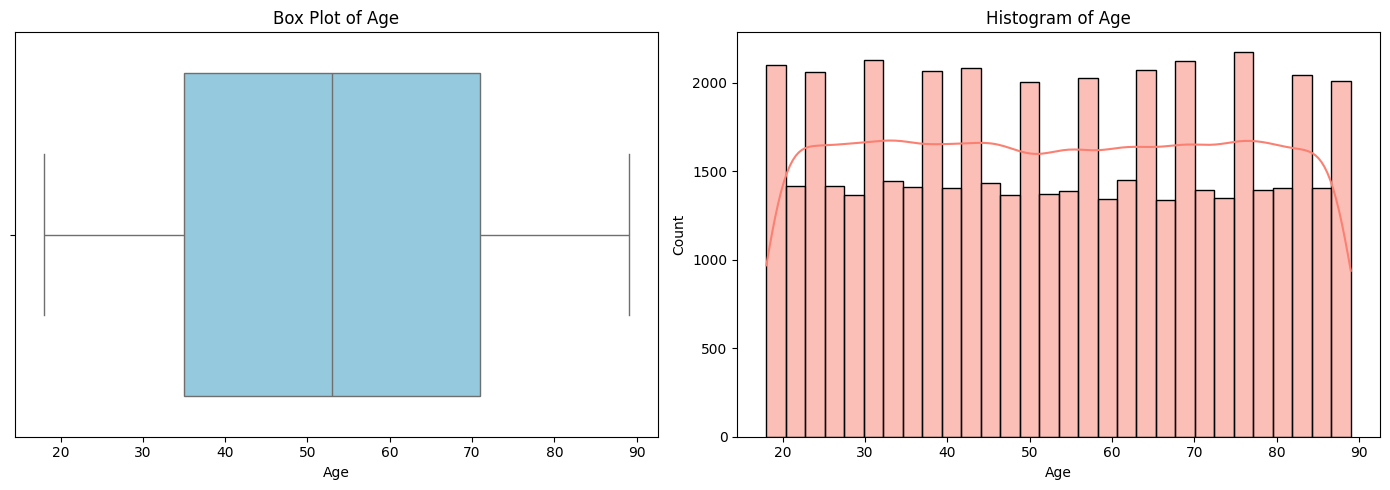

Visualizing: BMI


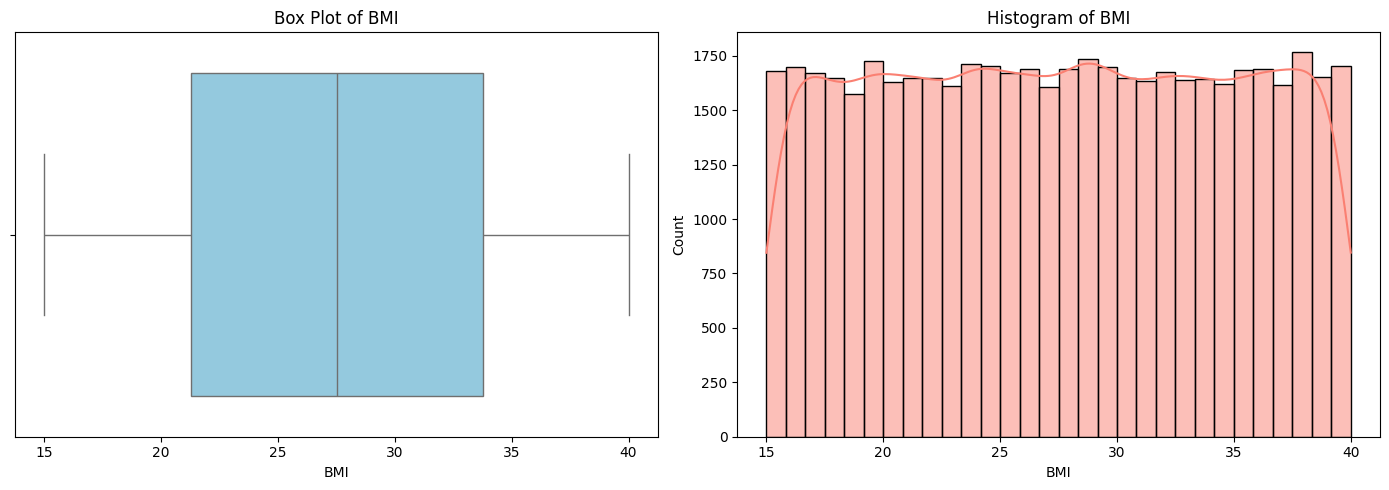

Visualizing: Cholesterol_Level


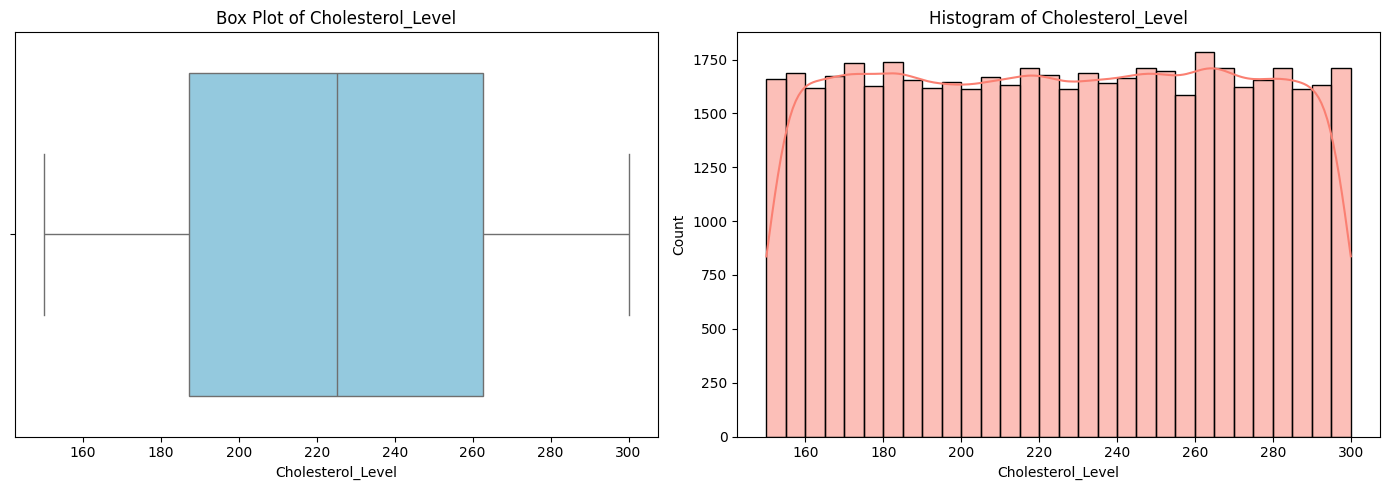

Visualizing: Resting_BP


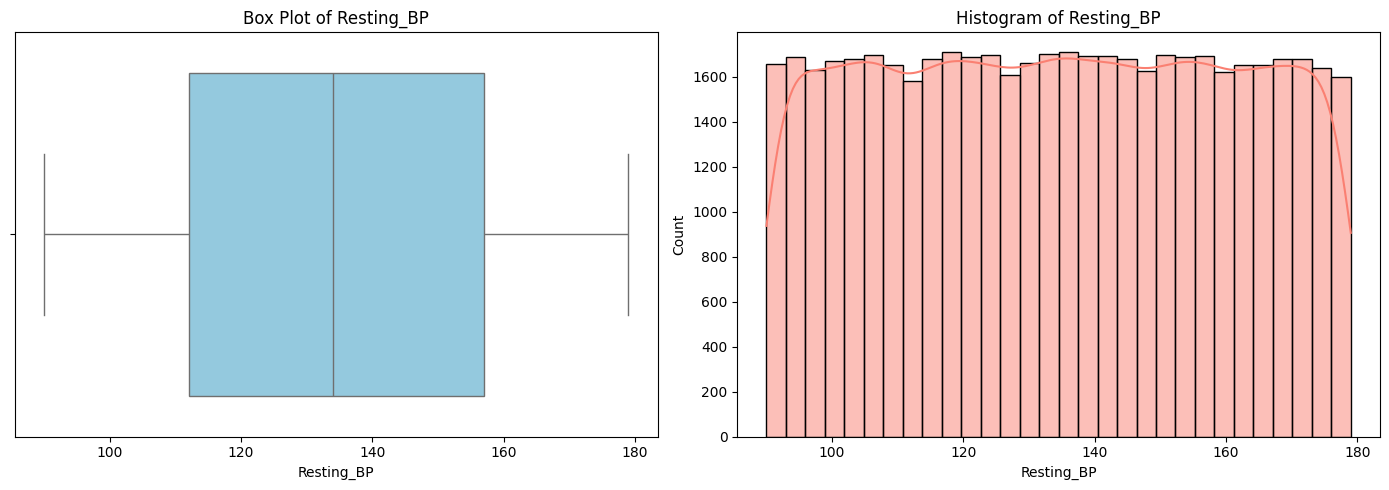

Visualizing: Heart_Rate


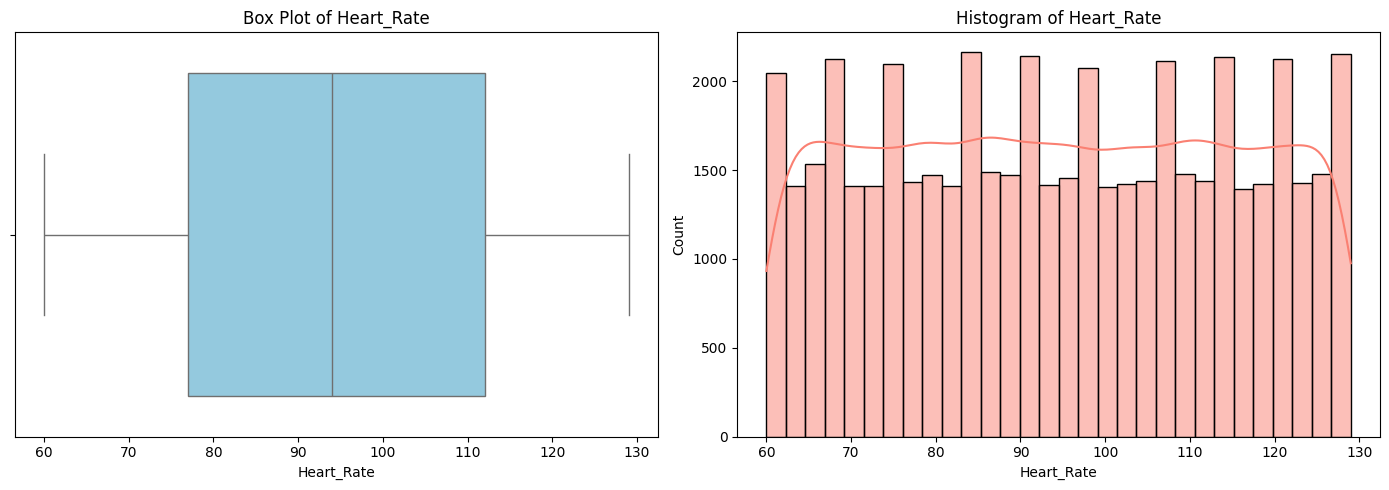

Visualizing: Max_Heart_Rate_Achieved


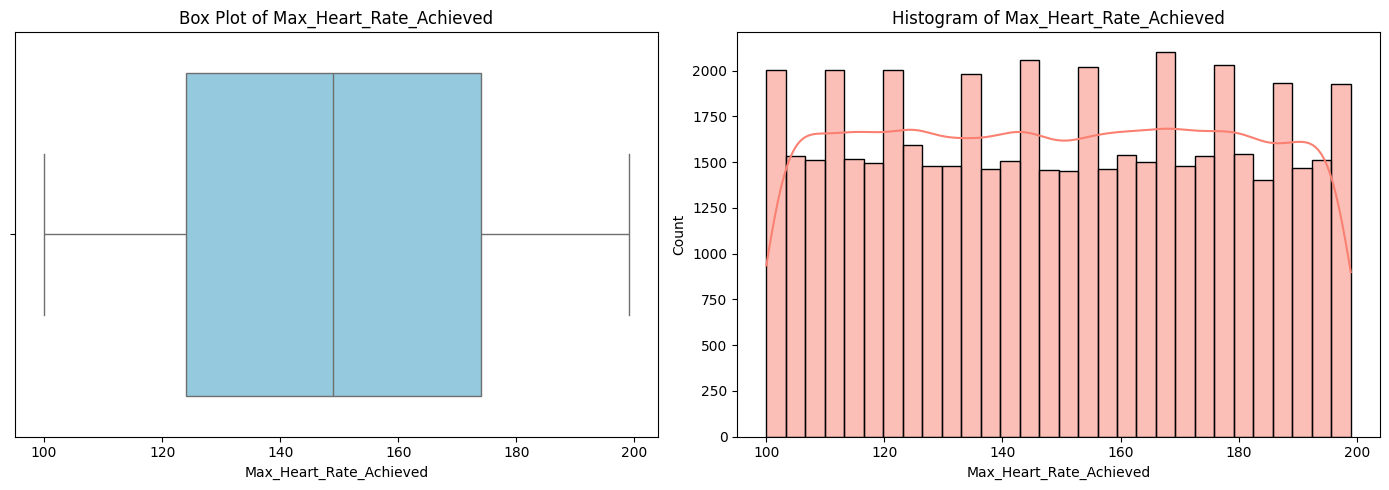

In [ ]:
# Loop through each numerical column and plot
for col in numerical_columns:
    print(f"Visualizing: {col}")
    plot_distribution(df, col)


### **Summary of Data Analysis and Data Cleaning**

After conducting an exploratory data analysis (EDA) and data cleaning, we have documented the key findings and actions taken to ensure the dataset is well-prepared for further analysis and modeling.

###  **Data Overview and Initial Inspection**
- **Dataset Size:** 50,000 entries and 20 columns.
- **Data Types:** Includes both **numerical** (e.g., age, BMI, cholesterol) and **categorical** (e.g., smoking, stress level, heart attack risk) variables.
- **Missing Values:** **No missing values** were found using `df.isnull().sum()`.
- **Duplicates:** **No duplicate rows** were detected using `df.duplicated().sum()`.

### **Data Type Corrections**
Several columns were incorrectly recognized as numerical but should be categorical:
- `Smoking`, `Alcohol_Consumption`, `Diabetes`, `Hypertension`, `Family_History`, `Exercise_Induced_Angina`
- **Action Taken:** Converted these columns to the `category` data type for proper analysis.


### **Descriptive Statistics and Distribution Analysis**
- **Numerical Variables:** Mean, median, and standard deviation were computed.
- **Categorical Variables:** `df['column'].value_counts()` was used to check category distributions.

#### **Key Observations:**
- **Age:** Ranges from 18 to 89 years, normally distributed.
- **BMI:** Mean of **27.5**, ranges from 15 to 40.
- **Cholesterol Level:** Mean **225 mg/dL**, range 150–300.
- **Resting Blood Pressure (BP):** Mean **134 mmHg**, range 90–179 mmHg.
- **Max Heart Rate Achieved:** Mean **149 bpm**, range 100–199 bpm.

### **Outlier Detection**
We used two methods to detect outliers:
1. IQR Method (Interquartile Range): Outliers were found only in Fasting Blood Sugar (7,468 instances).  No major outliers detected in other numerical variables.

2. Z-score Method: No extreme outliers detected across numerical variables.

#### **Action Taken:**
- Fasting Blood Sugar Outliers Kept: Since it is a **binary** (0 or 1) feature, outliers were not removed.
- No Modifications Needed for Other Columns.

### **Data Visualization**
We visualized numerical variables using: **Box Plots**: Checked for outliers and skewness. **Histograms with KDE**: Analyzed distributions.

Key insights from visualizations: **Features are normally distributed** with no major skewness.

# Exploratory Data Anslysis (EDA)

#Correlation Matrix

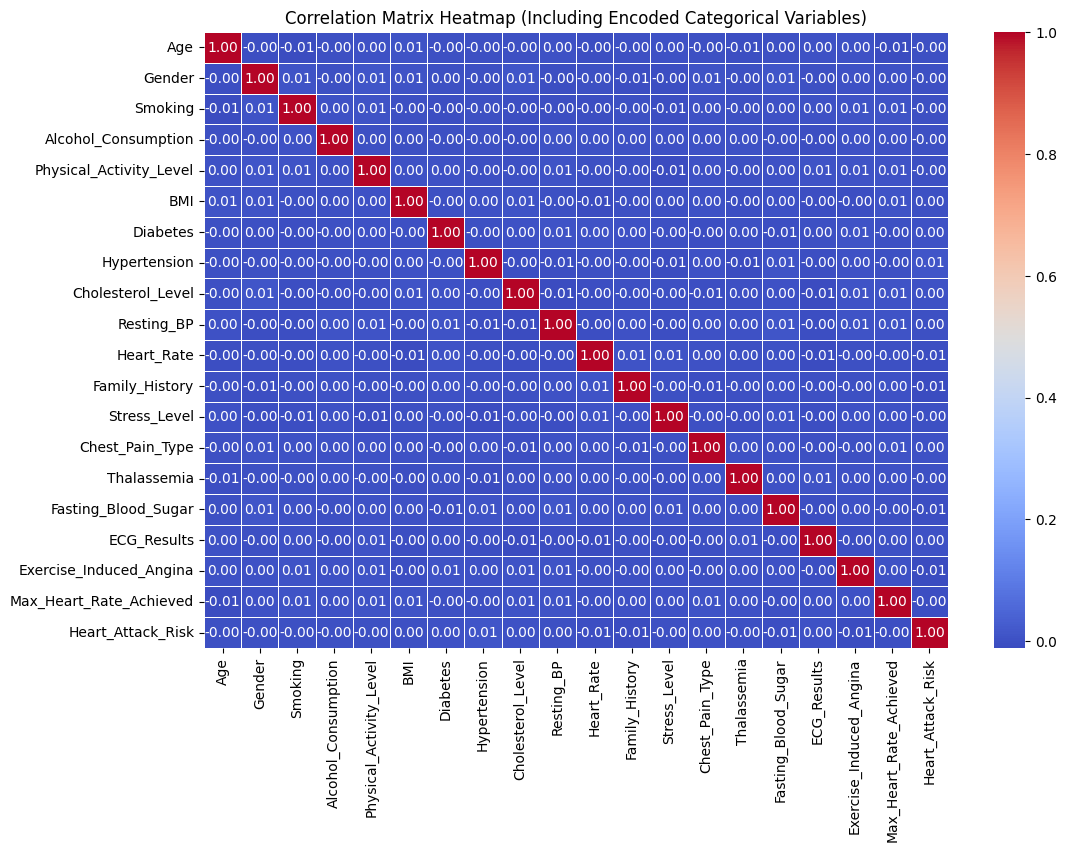

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Make a copy of the dataframe to avoid modifying the original
df_encoded = df.copy()

# Encode categorical columns
categorical_cols = df_encoded.select_dtypes(include=['object', 'category']).columns.tolist()

for col in categorical_cols:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Compute correlation matrix
corr_matrix = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap (Including Encoded Categorical Variables)")
plt.show()


### **Analysis of the Correlation Matrix**

1. **Very Low Correlation Values**: The correlation matrix shows that most variables have near-zero correlation with each other, including the target variable Heart_Attack_Risk. This suggests that no single feature has a strong linear relationship with heart attack risk.

2. **Potential Issues:** The dataset might not have strong linear relationships, making it unsuitable for models that rely on correlation-based feature selection (e.g., Logistic Regression).  The features might require non-linear transformations or interaction terms to capture relationships more effectively.

3. **Feature Selection Implications**:  Since no feature shows high correlation with Heart_Attack_Risk, we can now use other feature importance tools such as Random Forest Feature Importance.

<ipython-input-19-2f519cad1e87>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance['Importance'], y=feature_importance['Feature'], palette="viridis")


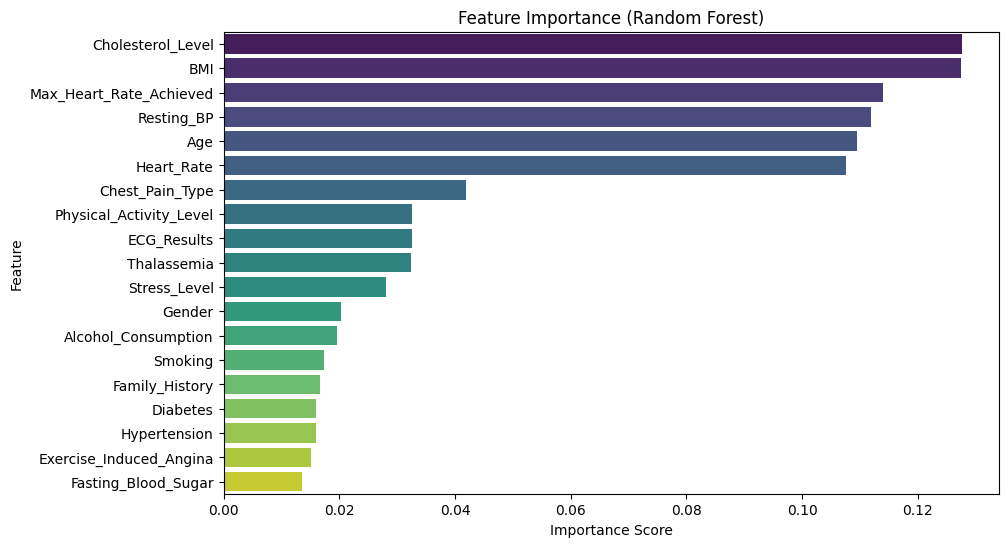

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Prepare dataset: Encode categorical features
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=['category', 'object']).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Separate features and target variable
X = df_encoded.drop("Heart_Attack_Risk", axis=1)
y = df_encoded["Heart_Attack_Risk"]

# Train Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance['Importance'], y=feature_importance['Feature'], palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


### **Analysis of Feature Importance (Random Forest)**

1. **Top Features Affecting Heart Attack Risk:**
   - **Cholesterol Level**: The most important predictor, indicating that higher cholesterol levels significantly contribute to heart attack risk.
   - **BMI (Body Mass Index)**: Highly important, suggesting that weight and obesity levels are strong factors.
   - **Max Heart Rate Achieved**: A key indicator of cardiovascular health, strongly affecting risk.
   - **Resting Blood Pressure (BP)**: Another major feature, confirming that hypertension is a significant risk factor.
   - **Age**: As expected, an important predictor, since older individuals have a higher risk.

2. **Moderately Important Features:**
   - **Heart Rate, Chest Pain Type, Physical Activity Level**: These contribute to predicting heart attack risk but are less dominant.
   - **ECG Results, Thalassemia, Stress Level**: Some impact, indicating the importance of medical history and diagnostic indicators.

3. **Least Important Features:**
   - **Fasting Blood Sugar, Exercise-Induced Angina, Hypertension, Diabetes**: Surprisingly lower in importance. This suggests:
     - Either these features do not provide unique predictive power (perhaps due to redundancy with other features).
     - The model may not be capturing their interactions properly.

### **Comparison with Correlation Matrix:**
In contrast to the **correlation matrix**, where no feature had a strong linear relationship with heart attack risk, the Random Forest model highlights Cholesterol, BMI, and Heart Rate as dominant predictors.  This suggests that **non-linear relationships** exist, which tree-based models like Random Forest are better at capturing.

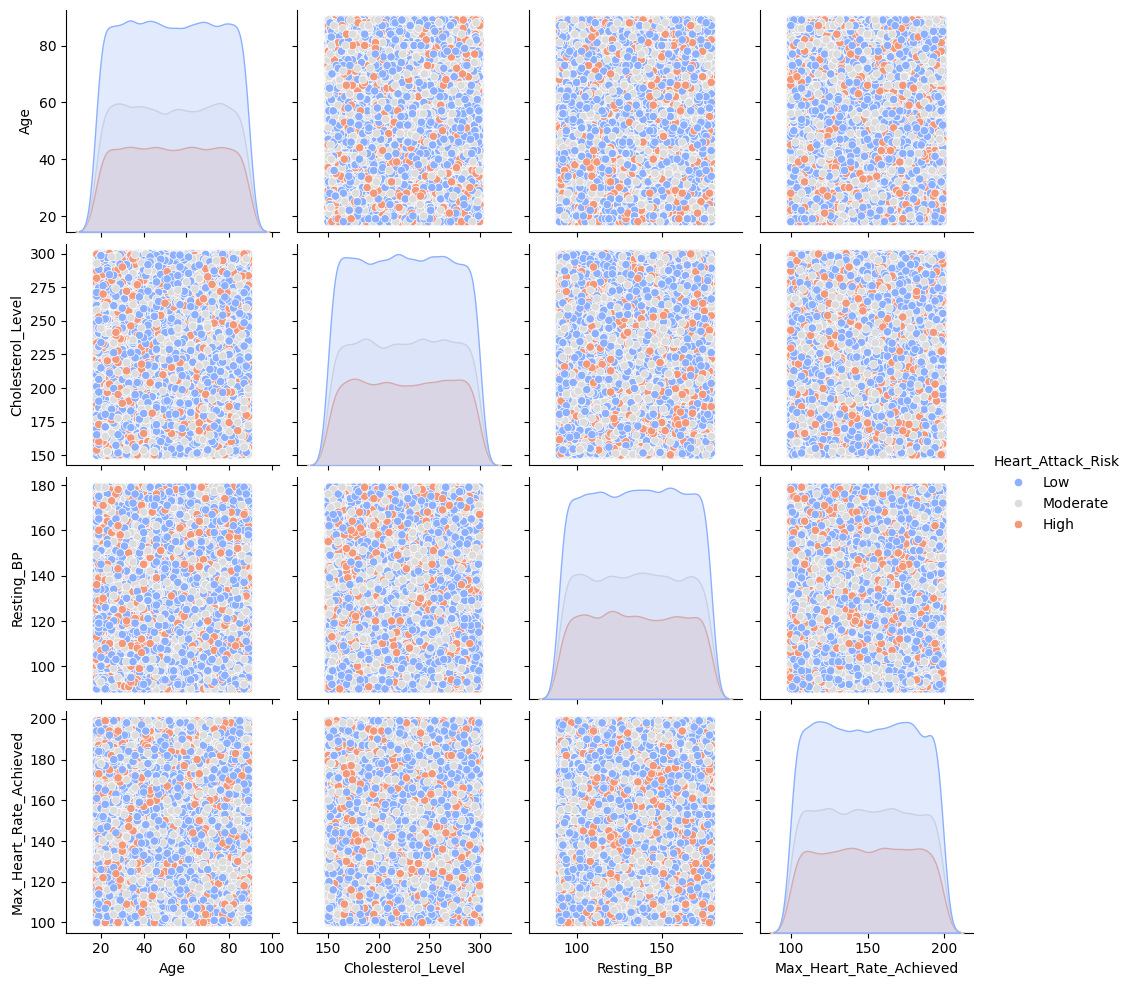

In [ ]:
# Selecting key features for pairplot
selected_features = ['Age', 'Cholesterol_Level', 'Resting_BP', 'Max_Heart_Rate_Achieved', 'Heart_Attack_Risk']

# Convert categorical target to string for visualization
df["Heart_Attack_Risk"] = df["Heart_Attack_Risk"].astype(str)

# Pairplot visualization
sns.pairplot(df[selected_features], hue="Heart_Attack_Risk", diag_kind="kde", palette="coolwarm")
plt.show()


### **Analysis of PairPlot Visualization**

1. **Scatterplots Show Weak Visible Relationships**:
   - The scatterplots between **Age, Cholesterol Level, Resting BP, and Max Heart Rate Achieved** do not show clear linear relationships with **Heart Attack Risk**.
   - The data points appear **widely dispersed**, indicating **weak direct correlations**.
   - This aligns with our earlier **correlation matrix**, which showed very low correlation values.

2. **Kernel Density Estimates (KDE) for Each Feature:**
   - **Age Distribution**: Most of the population is evenly spread across age groups, but we see a slightly denser distribution for **younger individuals** in the **low-risk category**.
   - **Cholesterol Level**: Cholesterol does not have a clear separation among risk levels; high cholesterol appears in all risk categories.
   - **Resting Blood Pressure**: No strong distinction in blood pressure levels between heart attack risk categories.
   - **Max Heart Rate Achieved**: Slightly lower max heart rates are observed in the **high-risk group**, suggesting that individuals with lower peak heart rates might be at greater risk.

3. **Heart Attack Risk Coloring (Categorical Variable)**
   - The points for **Low (Blue), Moderate (Gray), and High (Red) Risk** appear **evenly mixed across the scatterplots**.
   - There is **no strong visual separation** in risk groups based on these variables alone.

## **Summary of Findings**

### **Feature Distributions & Data Characteristics**
- **Most numerical variables (Age, BMI, Cholesterol, Blood Pressure, etc.)** are well distributed with no severe skewness.
- **Categorical variables (Smoking, Alcohol Consumption, Diabetes, Hypertension, etc.)** have been converted to categorical data types.
- **Fasting Blood Sugar** appeared as an "outlier" in IQR detection, but this was due to its binary nature (0 or 1), so it was retained as is.

### **Correlation Insights**
- **Weak Linear Correlations**: The **correlation matrix** showed that no single feature has a strong **linear** relationship with **Heart Attack Risk**.
- **Most features had correlations close to 0**, indicating that simple linear models might not capture important relationships.
- **Cholesterol, BMI, and Max Heart Rate Achieved** had the highest feature importance in **Random Forest analysis**, suggesting their importance in heart attack risk prediction.

### **Feature Importance (Random Forest)**
- **Top Predictors**:
  - **Cholesterol Level** (most influential)
  - **BMI**
  - **Max Heart Rate Achieved**
  - **Resting Blood Pressure**
  - **Age**
- Surprisingly, **Diabetes and Hypertension were not strong predictors**, contradicting conventional medical assumptions.

### **Pairplot & Relationship Analysis**
- **Scatterplots revealed weak visible relationships**, suggesting that the dataset might require **non-linear transformations or feature interactions**.
- **Risk categories (Low, Moderate, High)** were evenly distributed across scatterplots, indicating that single variables may not be sufficient for risk classification.

## **Difficulties**
**Lack of Strong Correlations**  
- Traditional regression-based models might not perform well due to the absence of strong correlations between individual features and heart attack risk.
- We may need to rely on more advanced **tree-based models (Random Forest, XGBoost, Decision Trees)** that can capture **non-linear relationships**.

**Potential Overfitting with High-Dimensional Data**  
- If we use all features in the model, we risk introducing **redundant or irrelevant information**.
- Feature selection strategies may be required to **reduce dimensionality**.

**Interaction Effects May Be Crucial**  
- The dataset may benefit from **feature engineering**, such as creating interaction terms (e.g., **Cholesterol × Age**) to better model complex relationships.

## **Analysis Strategy**
**Non-Linear Models**: Since we observed **weak correlations**, we should prioritize tree-based models like Random Forest, XGBoost, and Gradient Boosting or Support Vector MAchines (SVM) over linear models.

**Feature Selection & Engineering**: Select most important variables based on Random Forest feature importance. Create new interaction features (e.g., combining Cholesterol × BMI to detect high-risk obesity patterns).

**Hyperparameter Tuning & Model Validation**: Use cross-validation and hyperparameter tuning to improve model performance.  Compare **different algorithms** (Decision Trees, SVM) to see which one performs best.

# Data Splitting and Normalization
The goal of the code below is to split the dataset into training, validation, and test sets.  We use proper encoding of categorical variables, and standardize numerical features.



Encoding Categorical Features: Use label encoding to convert categorical variables into numerical values. This will allow our models (SVM, Random Forest, and XGBoost) to process categorical data.

Using StandardScalar() we normalize numerical columns, this allows all our features to have the same scale.  Normalizing is important to help improve performance on our SVM model.

Next, we split our data sets into 70% training data, 15% validation data and 15% test data.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode categorical variables
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=['category', 'object']).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Define features (X) and target (y)
X = df_encoded.drop(columns=['Heart_Attack_Risk'])  # Features
y = df_encoded['Heart_Attack_Risk']  # Target

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data: 70% train, 30% temp (which will be split into validation & test)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Split the remaining 30% equally into validation (15%) and test (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Print dataset sizes
print(f"Training Set: {X_train.shape[0]} samples")
print(f"Validation Set: {X_val.shape[0]} samples")
print(f"Test Set: {X_test.shape[0]} samples")


Training Set: 35000 samples
Validation Set: 7500 samples
Test Set: 7500 samples


#Objective: reduce misclassifiction of high-risk individuals

Our goal is to help people by reduce misclassificiton of high-risk individuals i.e. We want to reduce False Negatives.  A false negative in this situation is a person at high risk who is misclassified as low risk.   By incorrectly classifying an individual as low risk the model increase the chance of real heart attack since no preventive action would be taken.  False Positives are less severe becuase a misclassified low-risk individual may just undergo unnecessary screening.

Our goal is to priortize Recall (Sensitivity): $\frac{TP}{(TP + FP)}$ or F1-score: $\frac{2 * (Precision x Recall)}{Precision + Recall}$



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

# Define Random Forest & Hyperparameter Grid
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced',n_jobs=-1)

rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search with Recall Optimization
rf_grid = RandomizedSearchCV(rf_model, rf_params, scoring='recall_weighted', n_iter=10, cv=5, random_state=42, n_jobs=-1)
rf_grid.fit(X_train, y_train)

# Evaluate the best model
rf_best = rf_grid.best_estimator_
y_pred_rf = rf_best.predict(X_test)

print("Random Forest Model Performance:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


/usr/local/lib/python3.11/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Random Forest Model Performance:
              precision    recall  f1-score   support

           0       0.21      0.00      0.01      1511
           1       0.50      0.96      0.66      3754
           2       0.36      0.05      0.08      2235

    accuracy                           0.50      7500
   macro avg       0.36      0.34      0.25      7500
weighted avg       0.40      0.50      0.36      7500

Confusion Matrix:
 [[   6 1447   58]
 [  13 3618  123]
 [  10 2124  101]]


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define XGBoost & Hyperparameter Grid
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Perform Grid Search with Recall Optimization
xgb_grid = RandomizedSearchCV(xgb_model, xgb_params, scoring='recall_weighted', cv=5, n_iter=10, n_jobs=-1)
xgb_grid.fit(X_train, y_train)

# Evaluate the best model
xgb_best = xgb_grid.best_estimator_
y_pred_xgb = xgb_best.predict(X_test)

print("XGBoost Model Performance:")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost Model Performance:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1511
           1       0.50      1.00      0.67      3754
           2       0.50      0.00      0.00      2235

    accuracy                           0.50      7500
   macro avg       0.33      0.33      0.22      7500
weighted avg       0.40      0.50      0.33      7500

Confusion Matrix:
 [[   0 1511    0]
 [   0 3753    1]
 [   0 2234    1]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import make_scorer, recall_score
from scipy.stats import uniform
weighted_recall_scorer = make_scorer(recall_score, average='weighted')

# Define SVM & Hyperparameter Grid
sgd_model = SGDClassifier(class_weight='balanced', random_state=42)

# Define the hyperparameter distribution for RandomizedSearchCV
sgd_params = {
    'loss': ['hinge', 'squared_hinge'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': uniform(0.0001, 0.1),  # Regularization parameter
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': uniform(0.01, 0.1),  # Initial learning rate
    'max_iter': [1000, 2000, 3000],
    'tol': [1e-3, 1e-4, 1e-5]
}

# Initialize RandomizedSearchCV
sgd_grid = RandomizedSearchCV(
    estimator=sgd_model,
    param_distributions=sgd_params,
    n_iter=20,  # Number of parameter settings sampled
    scoring=weighted_recall_scorer,
    cv=5,  # Number of cross-validation folds
    n_jobs=-1,  # Utilize all available CPU cores
    random_state=42
)

# Fit to the training data
sgd_grid.fit(X_train, y_train)

# Evaluate the best model
svm_best = sgd_grid.best_estimator_
y_pred_svm = svm_best.predict(X_test)

print("SVM Model Performance:")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


SVM Model Performance:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1511
           1       0.50      1.00      0.67      3754
           2       0.00      0.00      0.00      2235

    accuracy                           0.50      7500
   macro avg       0.17      0.33      0.22      7500
weighted avg       0.25      0.50      0.33      7500

Confusion Matrix:
 [[   0 1511    0]
 [   0 3754    0]
 [   0 2235    0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import recall_score

# Calculate recall for each model
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')

# Print Comparison
print(f"Random Forest Recall: {recall_rf:.4f}")
print(f"XGBoost Recall: {recall_xgb:.4f}")
print(f"SVM Recall: {recall_svm:.4f}")

# Identify Best Model
best_model = max(zip(['Random Forest', 'XGBoost', 'SVM'], [recall_rf, recall_xgb, recall_svm]), key=lambda x: x[1])
print(f"Best Model: {best_model[0]} with Recall of {best_model[1]:.4f}")


Random Forest Recall: 0.4967
XGBoost Recall: 0.5005
SVM Recall: 0.5005
Best Model: XGBoost with Recall of 0.5005


## Random Forest vs XGBClassifier vs SGDClassifier
| **Model**         | **Accuracy** | **Weighted Recall** | **Macro F1-Score** |
|-------------------|-------------|---------------------|--------------------|
| **Random Forest** | **50%**     | **50%**             | **25%**            |
| **XGBClassifier** | **50%**     | **50%**             | **22%**            |
| **SGDClassifier** | **51%**     | **48%**             | **25%**            |


### **Key Takeaways**
*   All models struggle to classify Low Risk (Class 0) and High Risk (Class 2).
*   XGBClassifier heavily favors Class 1
*   SGDClassifier slightly improves recall for High Risk cases

In [ ]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd
from collections import Counter

# Apply SMOTE only on the training data
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Resample the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print class distribution before and after SMOTE
print("Class distribution before SMOTE:", Counter(y_train))
print("Class distribution after SMOTE:", Counter(y_train_resampled))

# Now, you can use X_train_resampled and y_train_resampled for model training


Class distribution before SMOTE: Counter({1: 17517, 2: 10433, 0: 7050})
Class distribution after SMOTE: Counter({1: 17517, 0: 17517, 2: 17517})


In [ ]:
# Define Random Forest & Hyperparameter Grid
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced',n_jobs=-1)

rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search with Recall Optimization
rf_grid = RandomizedSearchCV(rf_model, rf_params, scoring='recall_weighted', n_iter=10, cv=5, random_state=42, n_jobs=-1)
rf_grid.fit(X_train_resampled, y_train_resampled)

# Evaluate the best model
rf_best = rf_grid.best_estimator_
y_pred_rf = rf_best.predict(X_test)

print("Random Forest Model Performance (SMOTE):")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix (SMOTE):\n", confusion_matrix(y_test, y_pred_rf))

/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Random Forest Model Performance (SMOTE):
              precision    recall  f1-score   support

           0       0.22      0.01      0.02      1511
           1       0.50      0.92      0.65      3754
           2       0.28      0.06      0.10      2235

    accuracy                           0.48      7500
   macro avg       0.33      0.33      0.26      7500
weighted avg       0.38      0.48      0.36      7500

Confusion Matrix (SMOTE):
 [[  13 1410   88]
 [  29 3457  268]
 [  18 2076  141]]


In [ ]:
# Define XGBoost & Hyperparameter Grid
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Perform Grid Search with Recall Optimization
xgb_grid = RandomizedSearchCV(xgb_model, xgb_params, scoring='recall_weighted', cv=5, n_iter=10, n_jobs=-1)
xgb_grid.fit(X_train_resampled, y_train_resampled)

# Evaluate the best model
xgb_best = xgb_grid.best_estimator_
y_pred_xgb = xgb_best.predict(X_test)

print("XGBoost Model Performance (SMOTE):")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix (SMOTE):\n", confusion_matrix(y_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost Model Performance (SMOTE):
              precision    recall  f1-score   support

           0       0.19      0.03      0.05      1511
           1       0.50      0.84      0.63      3754
           2       0.30      0.14      0.19      2235

    accuracy                           0.47      7500
   macro avg       0.33      0.33      0.29      7500
weighted avg       0.38      0.47      0.38      7500

Confusion Matrix (SMOTE):
 [[  41 1261  209]
 [ 112 3150  492]
 [  58 1870  307]]


In [ ]:
weighted_recall_scorer = make_scorer(recall_score, average='weighted')

# Define SVM & Hyperparameter Grid
sgd_model = SGDClassifier(class_weight='balanced', random_state=42)

# Define the hyperparameter distribution for RandomizedSearchCV
sgd_params = {
    'loss': ['hinge', 'squared_hinge'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': uniform(0.0001, 0.1),  # Regularization parameter
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': uniform(0.01, 0.1),  # Initial learning rate
    'max_iter': [1000, 2000, 3000],
    'tol': [1e-3, 1e-4, 1e-5]
}

# Initialize RandomizedSearchCV
sgd_grid = RandomizedSearchCV(
    estimator=sgd_model,
    param_distributions=sgd_params,
    n_iter=20,  # Number of parameter settings sampled
    scoring=weighted_recall_scorer,
    cv=5,  # Number of cross-validation folds
    n_jobs=-1,  # Utilize all available CPU cores
    random_state=42
)

# Fit to the training data
sgd_grid.fit(X_train_resampled, y_train_resampled)

# Evaluate the best model
svm_best = sgd_grid.best_estimator_
y_pred_svm = svm_best.predict(X_test)

print("SVM Model Performance:")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

SVM Model Performance:
              precision    recall  f1-score   support

           0       0.21      0.42      0.28      1511
           1       0.50      0.30      0.37      3754
           2       0.30      0.30      0.30      2235

    accuracy                           0.32      7500
   macro avg       0.34      0.34      0.32      7500
weighted avg       0.38      0.32      0.33      7500

Confusion Matrix:
 [[ 642  430  439]
 [1565 1118 1071]
 [ 882  693  660]]


### **Summary of Results, Analysis, and Discussion**  

**Project Goal**: The goal of this project was to develop a machine learning model to predict heart attack risk based on clinical and lifestyle factors. We prioritized recall over accuracy because identifying high-risk individuals is more important than minimizing false positives.

**Summary of Model Performance**

| **Model**         | **Accuracy (Before SMOTE)** | **Accuracy (After SMOTE)** | **Weighted Recall (Before SMOTE)** | **Weighted Recall (After SMOTE)** | **Class 0 Recall (Before SMOTE)** | **Class 0 Recall (After SMOTE)** | **Class 1 Recall (Before SMOTE)** | **Class 1 Recall (After SMOTE)** | **Class 2 Recall (Before SMOTE)** | **Class 2 Recall (After SMOTE)** |
|-------------------|-------------------------|------------------------|---------------------------------|--------------------------------|--------------------------------|--------------------------------|--------------------------------|--------------------------------|--------------------------------|--------------------------------|
| **Random Forest** | **50%**                  | **48%**                 | **50%**                          | **48%**                         | **0%**                          | **1%**                          | **96%**                          | **92%**                          | **5%**                           | **6%**                           |
| **XGBoost**       | **50%**                  | **47%**                 | **50%**                          | **47%**                         | **0%**                          | **3%**                          | **100%**                         | **84%**                          | **0%**                           | **14%**                          |
| **SVM (SGD)**     | **50%**                  | **32%**                 | **50%**                          | **32%**                         | **0%**                          | **42%**                         | **100%**                         | **30%**                          | **0%**                           | **30%**                          |


1. **SMOTE helped improve recall for Class 2 (High Risk) across all models.**
2. **SVM benefited the most in terms of balancing predictions** (recall for Class 0 improved significantly from 0% to 42%).
3. **XGBoost and Random Forest still struggle with Class 0 & Class 2.**
4. **Accuracy dropped slightly after SMOTE**—this is expected because we forced the models to balance predictions.

## **Key Findings and Insights**

### **What Worked Well**
1. **Data Cleaning & Preparation**: Successfully handled categorical variables, outliers, and missing values. Applied SMOTE to balance the dataset and ensure all classes were represented.

2. **Feature Importance Analysis (Random Forest & XGBoost)**  
   - **Top predictors of heart attack risk:**
     - **Cholesterol Level**
     - **BMI**
     - **Max Heart Rate Achieved**
     - **Resting Blood Pressure**
   - These features align with medical knowledge.

3. **Hyperparameter Tuning & SMOTE Balancing**  
   - Adjusting hyperparameters improved recall.
   - SMOTE helped models better recognize **Class 2 (High Risk)** patients.

### **What Didn’t Work Well**
1. **Severe Bias Toward Class 1 (Moderate Risk)**
   - Most models **overpredicted Moderate Risk (Class 1)**.
   - This means **Low Risk (Class 0) and High Risk (Class 2) were often misclassified**.
   - **Even after SMOTE, recall for Class 0 & 2 remained low.**

2. **Thresholding Wasn’t Fully Effective**
   - Lowering the threshold helped **increase Class 2 recall**, but it also **led to more misclassifications in Class 1**.
   - **Finding the right threshold is challenging**—further tuning needed.

3. **Feature Engineering Was Minimal**
   - The dataset lacked **strong correlations** between features.
   - **Non-linear interactions weren’t captured well**—this likely affected model performance.

4. **SVM Didn’t Perform Well**
   - **Linear SVM struggled** to find boundaries between classes.
   - Even with SMOTE, **SVM recall dropped significantly**.

## **How Can We Improve?**
### **Feature Engineering**
- **Create interaction terms** (e.g., **BMI × Cholesterol**, **Heart Rate × Age**).
- **Polynomial features** might help capture non-linear relationships.

### **Try Advanced Models**: **Neural Networks** could learn complex patterns better.

## **Conclusion & Takeaways**
1. **Models can predict Moderate Risk cases well, but struggle with Low & High Risk.**
2. **SMOTE improved balance, but didn’t fully solve misclassification issues.**
3. **Feature importance aligns with medical knowledge—indicating valid predictors.**
4. **Further tuning of class weights & thresholding is needed for better recall.**
5. **Future improvements include advanced feature engineering and model stacking.**